In [1]:
!sudo apt-get install -y fonts-NanumBarunGothic
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package fonts-NanumBarunGothic
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np

In [3]:
#머신러닝에 필요한 기본 패키지 설치
!pip install geopandas
!pip install scipy
!pip install matplotlib
!pip install ipython
!pip install scikit-learn
!pip install pillow
!pip install wrapt
!pip install tensorflow==2.0.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 6.2 MB/s 
     |████████████████████████████████| 6.3 MB 43.1 MB/s 
     |████████████████████████████████| 16.7 MB 410 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-

In [4]:
#머신러닝 데이터 적재
from os import listdir
from os.path import isfile, join
import pandas as pd
import geopandas as gpd
import time
import json
import folium
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import seaborn as sns
import fiona
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import Point, Polygon, LineString
from shapely import wkt

from tqdm import trange, tqdm, tqdm_notebook, tnrange

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Binarizer, MinMaxScaler
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# **[Train Dataset]**

# 학습용 데이터 불러오기


*   250격자 고양시(0값 제거)
*   500격자 고양시(0값 제거)






In [29]:
df = pd.read_csv('/content/250격자 고양시(0값 제거).csv') 
len(df)

2776

In [28]:
df= df.fillna(0)

결측치/결측값(missing value) 시각화

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_

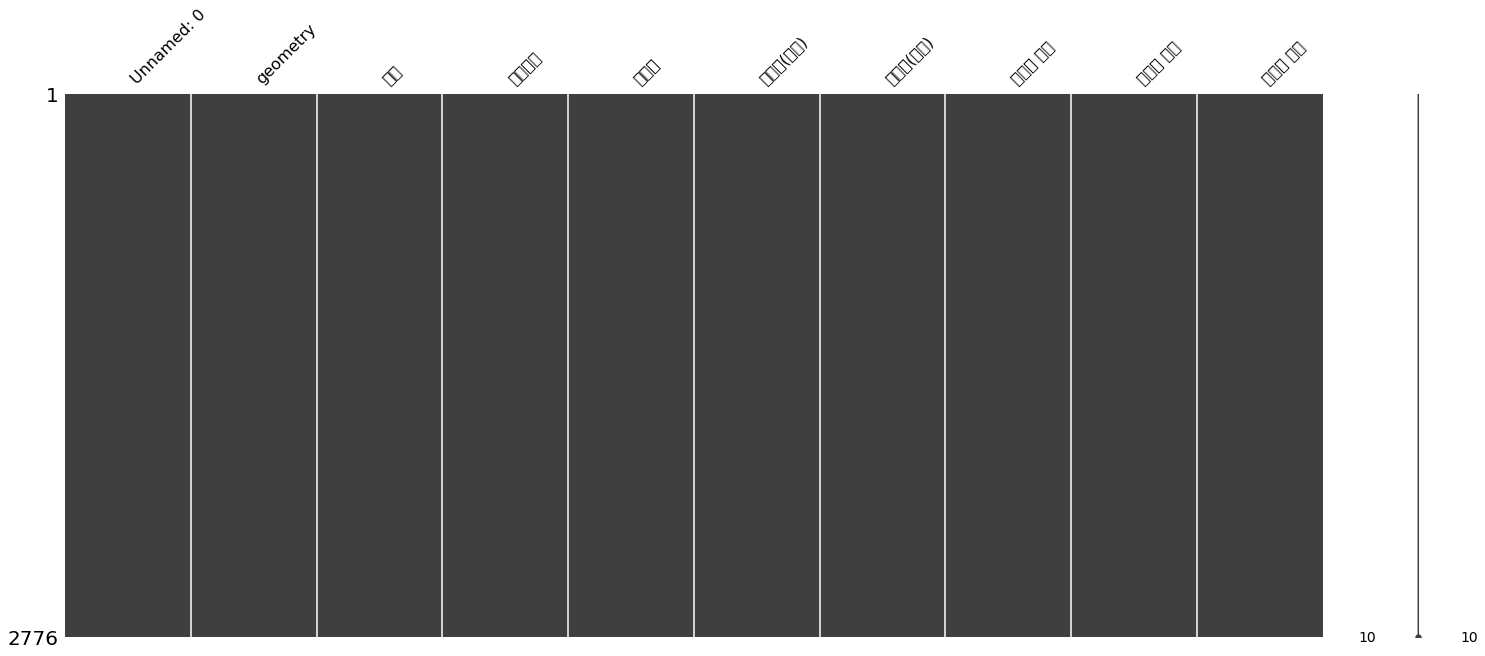

In [8]:
import missingno as msno
msno.matrix(df)

#상관관계 확인


*   각 변수들끼리의 상관관계를 확인하고 시각화 해서 종속변수와 상관관계가 높은 변수들만 선택




In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")


In [30]:
X = df.iloc[:, 2:-8]
y = df.iloc[:, -1]

In [13]:
# matplotlib 한글 지원 폰트 설정
plt.rc('font',family = 'NanumBarunGothic')

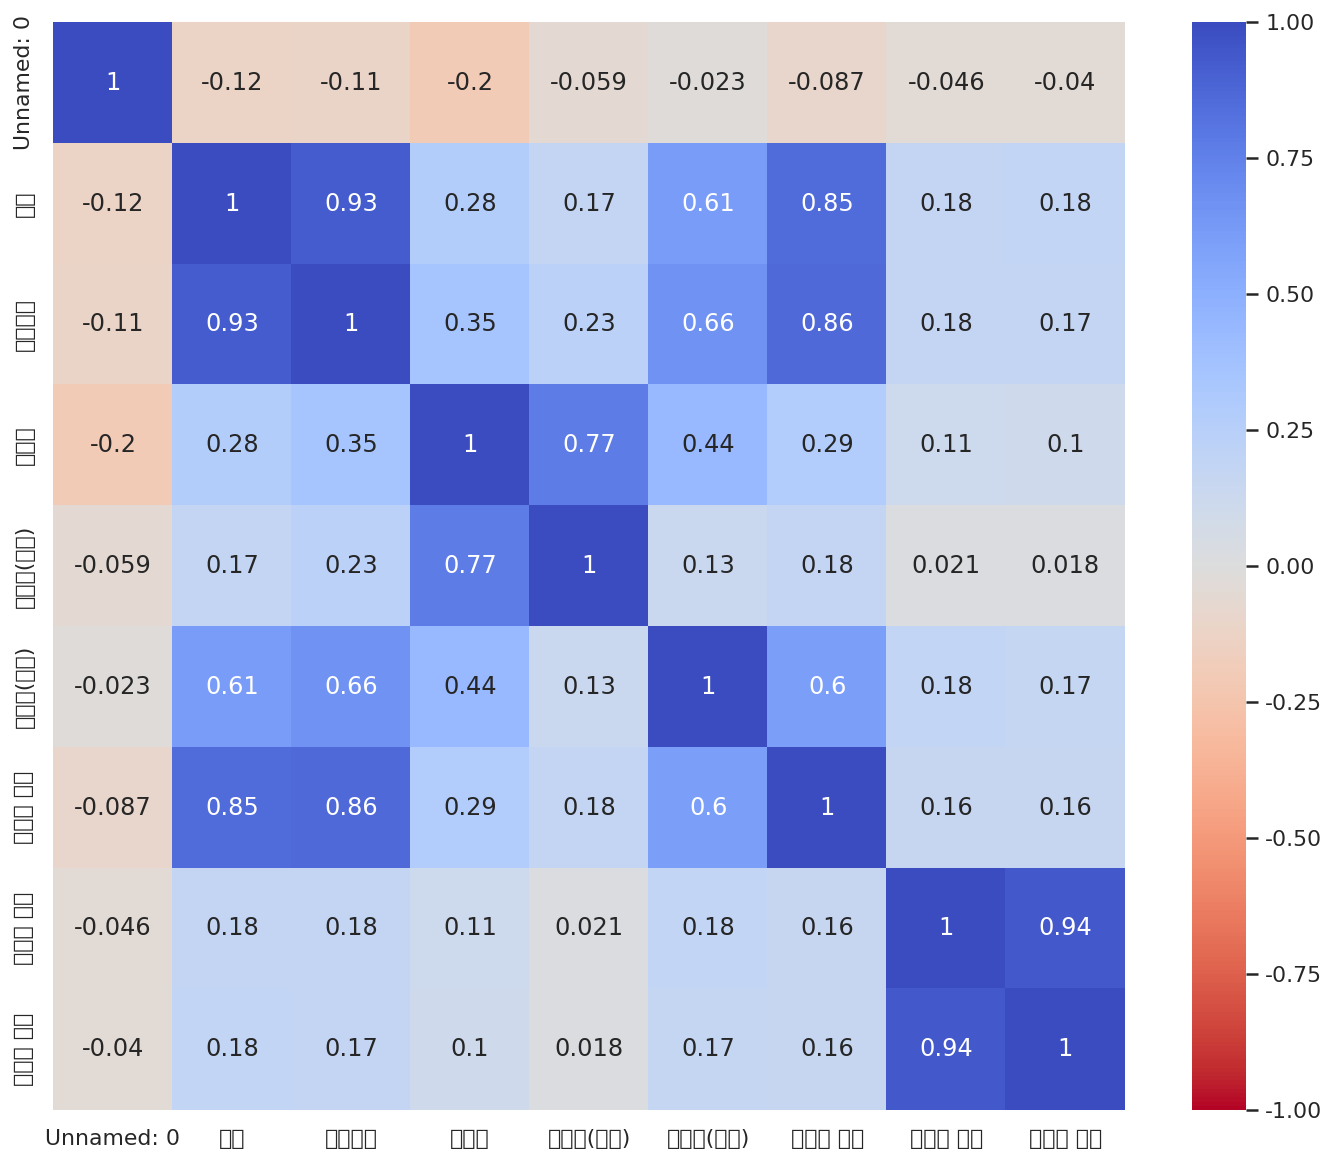

In [31]:
import seaborn as sns
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm_r")

plt.show()

#Target = 정류장유무 지정



In [32]:
target = df['정류장 유무']
df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,정류장 개수,정류장 유무
0,41,MULTIPOLYGON (((126.67778315758537 37.68167378...,0.0,0.0,3.0,0.0,0.0,0.000000,0.0,0
1,42,MULTIPOLYGON (((126.6777582861303 37.683926894...,11.0,0.0,4.0,1.0,0.0,0.384466,0.0,0
2,53,MULTIPOLYGON (((126.68066768476355 37.67718727...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0
3,54,MULTIPOLYGON (((126.68064290456248 37.67944039...,6.0,0.0,14.0,1.0,0.0,0.209709,0.0,0
4,55,MULTIPOLYGON (((126.68061812160066 37.68169351...,52.0,14.0,52.0,8.0,0.0,1.817476,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2771,4396,MULTIPOLYGON (((126.97290340682332 37.64505550...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0
2772,4398,MULTIPOLYGON (((126.97287155788261 37.64956203...,0.0,0.0,7.0,0.0,0.0,0.000000,0.0,0
2773,4417,MULTIPOLYGON (((126.97581631384938 37.63380178...,0.0,0.0,4.0,0.0,0.0,0.000000,0.0,0
2774,4422,MULTIPOLYGON (((126.97573715038091 37.64506812...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,0


Target 값 시각화

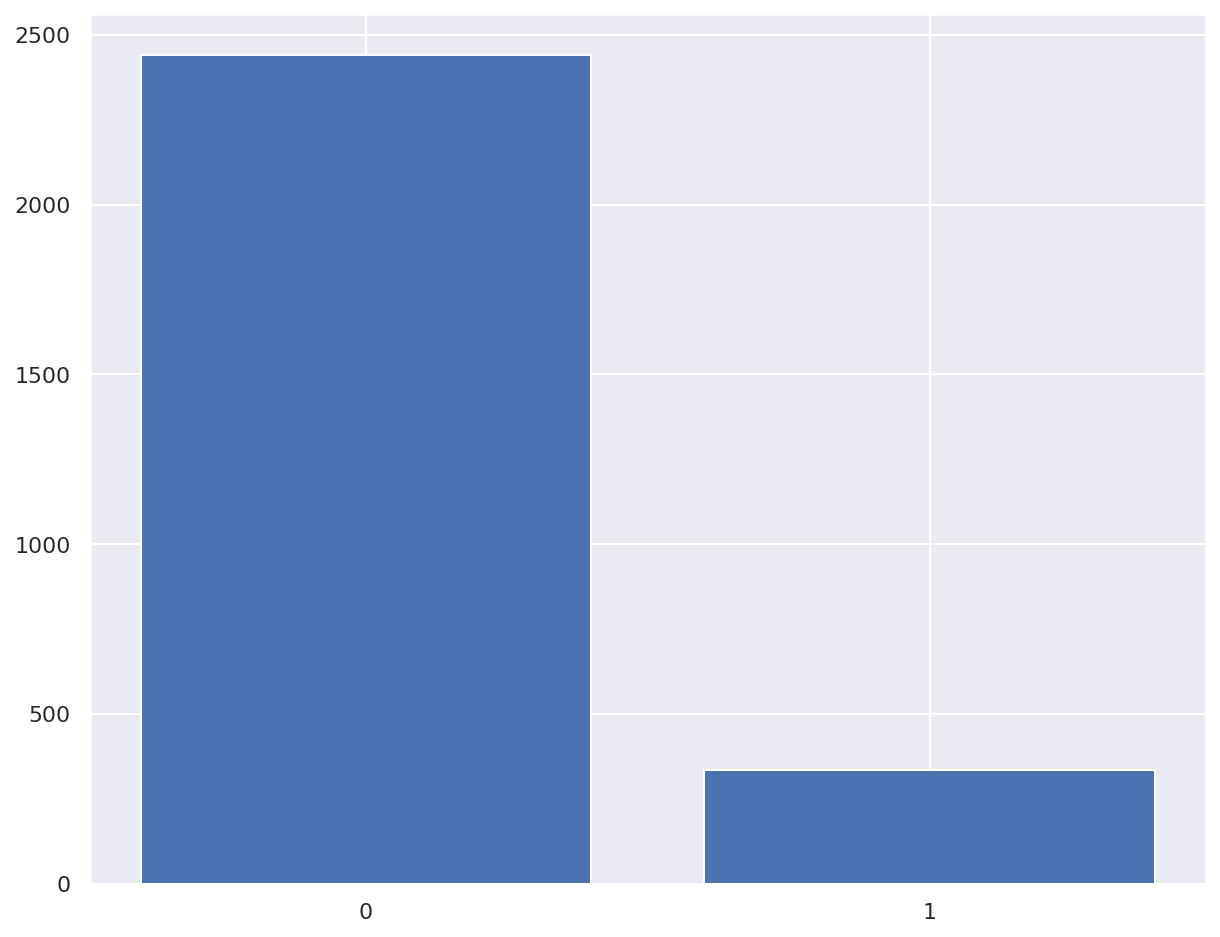

0    2440
1     336
Name: 정류장 유무, dtype: int64


In [33]:
plt.bar(target.unique(), target.value_counts())
plt.xticks([0, 1])
plt.show()
print(target.value_counts())

필요없는 컬럼값 제거

In [34]:
df = df.drop(['geometry'], axis=1)
df = df.drop([df.columns[0]], axis=1)
df = df.drop(['정류장 유무'], axis =1)
df = df.drop(['정류장 개수'], axis =1)


df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,3.0,0.0,0.0,0.000000
1,11.0,0.0,4.0,1.0,0.0,0.384466
2,0.0,0.0,1.0,0.0,0.0,0.000000
3,6.0,0.0,14.0,1.0,0.0,0.209709
4,52.0,14.0,52.0,8.0,0.0,1.817476


# 분류모형의 Feature Importance


정규화(Feature Scaling)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])

In [36]:
df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.00000,0.017341,0.000000,0.0,0.000000
1,0.001839,0.00000,0.023121,0.005952,0.0,0.000631
2,0.000000,0.00000,0.005780,0.000000,0.0,0.000000
3,0.001003,0.00000,0.080925,0.005952,0.0,0.000344
4,0.008691,0.01649,0.300578,0.047619,0.0,0.002983
...,...,...,...,...,...,...
2771,0.000000,0.00000,0.005780,0.000000,0.0,0.000000
2772,0.000000,0.00000,0.040462,0.000000,0.0,0.000000
2773,0.000000,0.00000,0.023121,0.000000,0.0,0.000000
2774,0.000000,0.00000,0.034682,0.000000,0.0,0.000000


In [37]:
from sklearn.model_selection import train_test_split

data_train = df
target_train = target


In [38]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, random_state = 22)
rf_model.fit(data_train, target_train)


features = pd.DataFrame(data=np.c_[X.columns.values,rf_model.feature_importances_],
                        columns=["feature", "importance"])



features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

ValueError: ignored

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score




# **[Test Dataset]**

# 테스트용 데이터 불러오기


*   250격자 세종시(0값 제거)
*   500격자 세종시(0값 제거)


In [45]:
#데이터 불러오기
s_df = pd.read_csv('/content/250격자 세종시(0값 제거).csv',  encoding='UTF-8') 
len(s_df)

3339

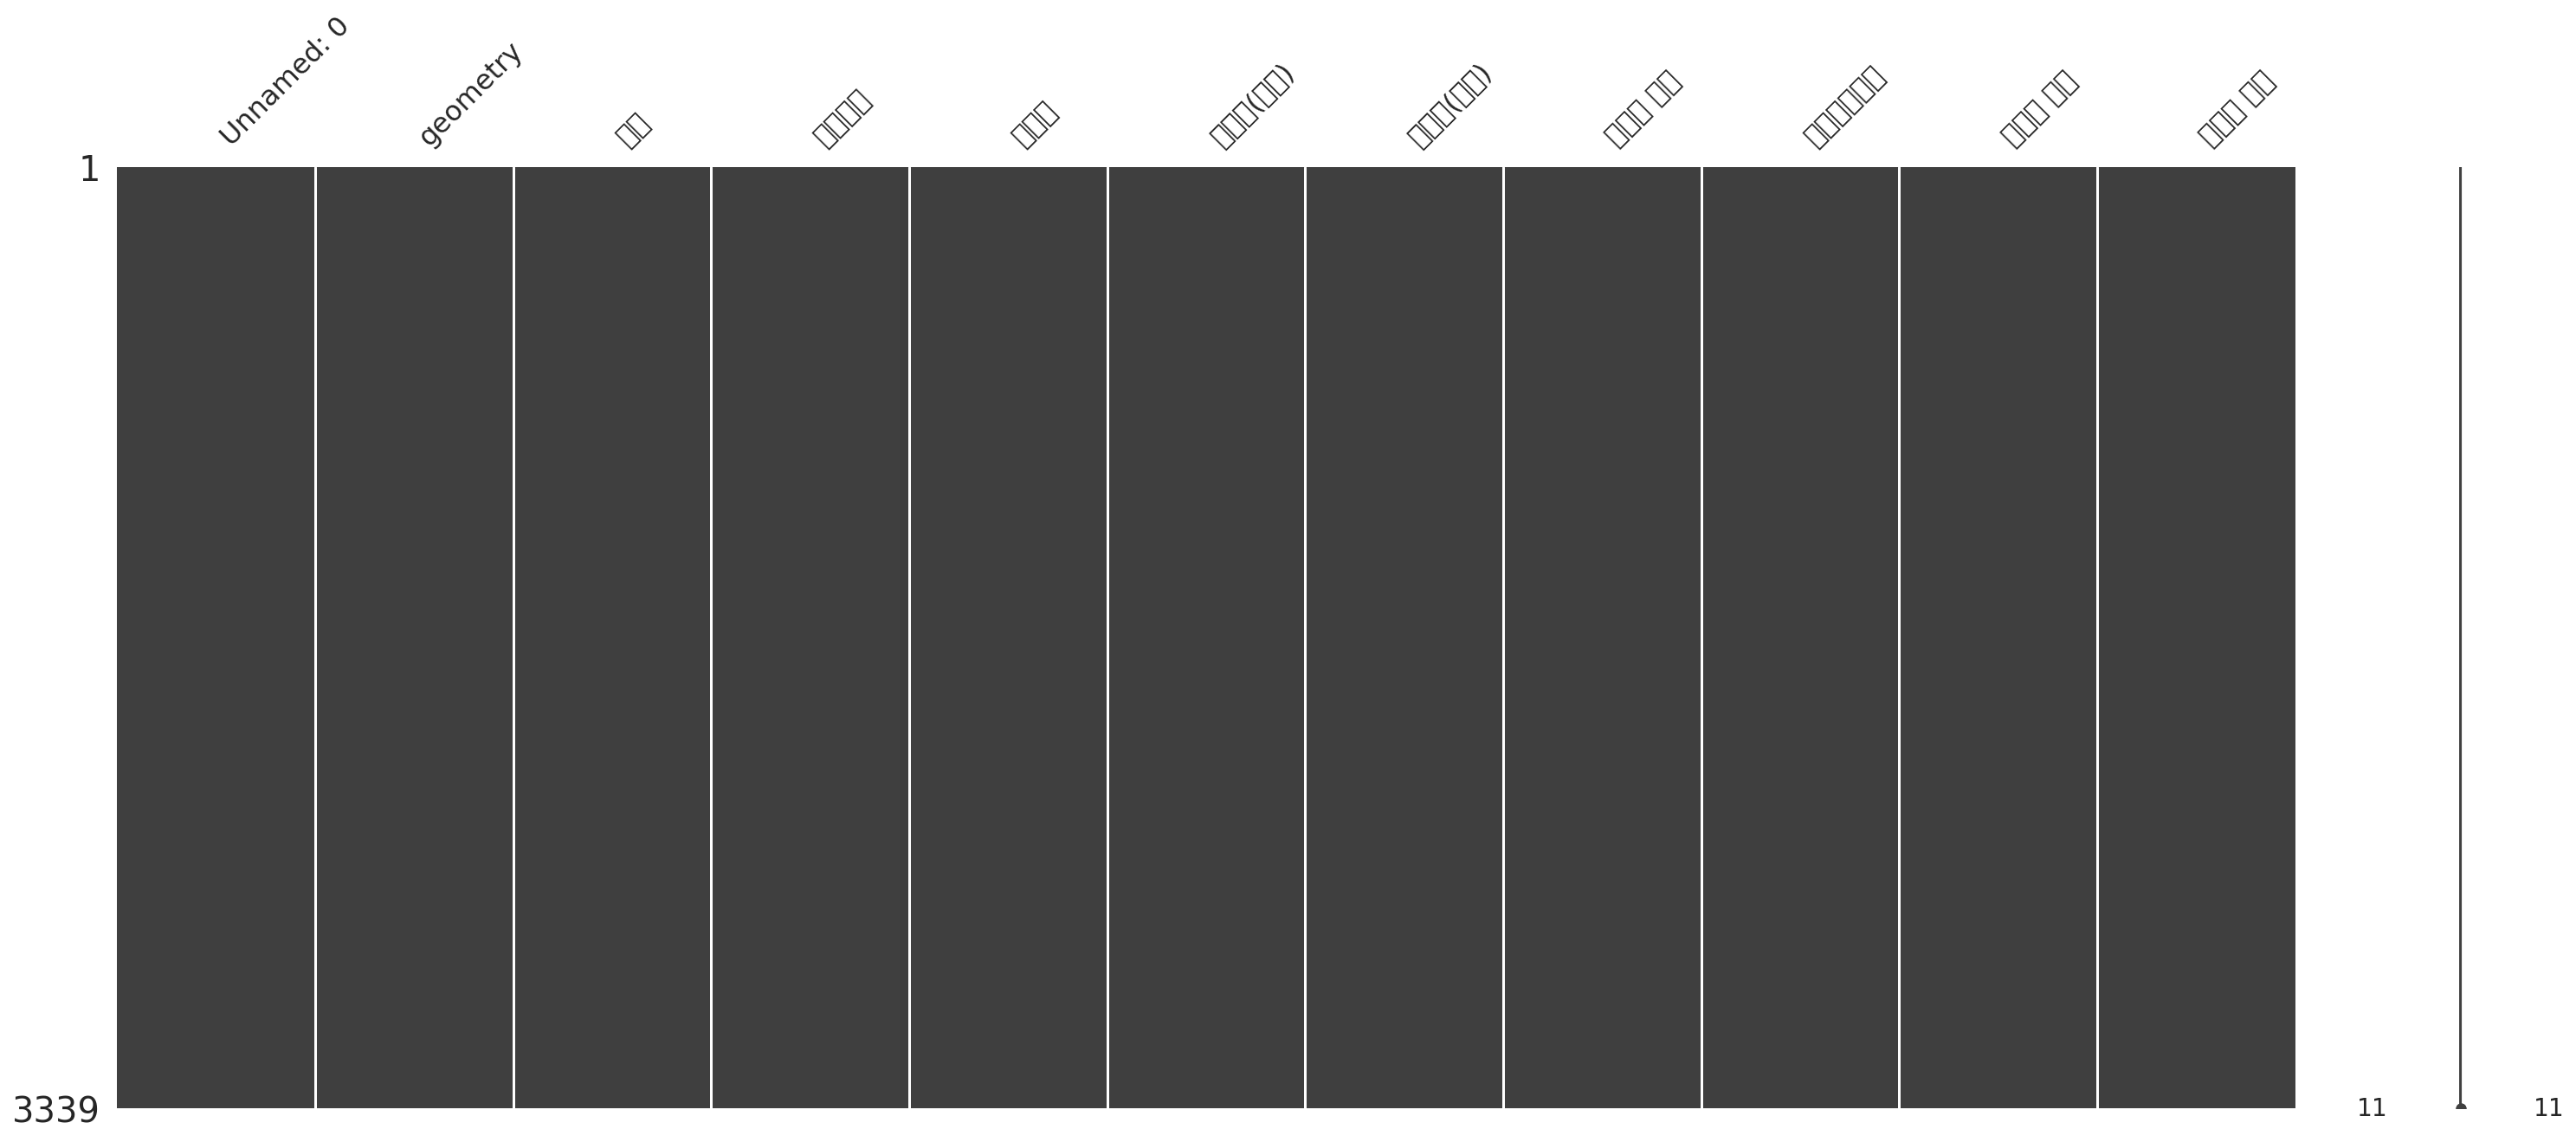

In [46]:
import missingno as msno

msno.matrix(s_df)

#Target = 정류장 유무 지정



In [47]:
S_target = s_df['정류장 유무']
s_df

,Unnamed: 0,geometry,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구,출발지도착지,정류장 개수,정류장 유무
0,16,MULTIPOLYGON (((127.1361196906431 36.708204388...,0.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0
1,17,MULTIPOLYGON (((127.13610906425943 36.71045806...,6.0,0.0,2.0,2.0,0.0,0.623145,0.0,0.0,0
2,29,MULTIPOLYGON (((127.1389187193515 36.708212911...,0.0,0.0,6.0,3.0,0.0,0.000000,0.0,0.0,0
3,30,MULTIPOLYGON (((127.1389081747034 36.710466584...,22.0,10.0,12.0,11.0,0.0,2.284866,0.0,0.0,0
4,31,MULTIPOLYGON (((127.13889762888313 36.71272025...,0.0,0.0,4.0,1.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3334,7765,MULTIPOLYGON (((127.40508212079371 36.50363085...,9.0,6.0,6.0,6.0,0.0,0.855057,0.0,0.0,0
3335,7766,MULTIPOLYGON (((127.40507936945991 36.50588465...,24.0,10.0,11.0,10.0,0.0,2.280151,0.0,0.0,0
3336,7773,MULTIPOLYGON (((127.40505183929982 36.52842252...,0.0,0.0,5.0,2.0,0.0,0.000000,0.0,0.0,0
3337,7777,MULTIPOLYGON (((127.40788449849332 36.49461786...,0.0,0.0,3.0,2.0,0.0,0.000000,0.0,0.0,0


Test target 결과값 시각화

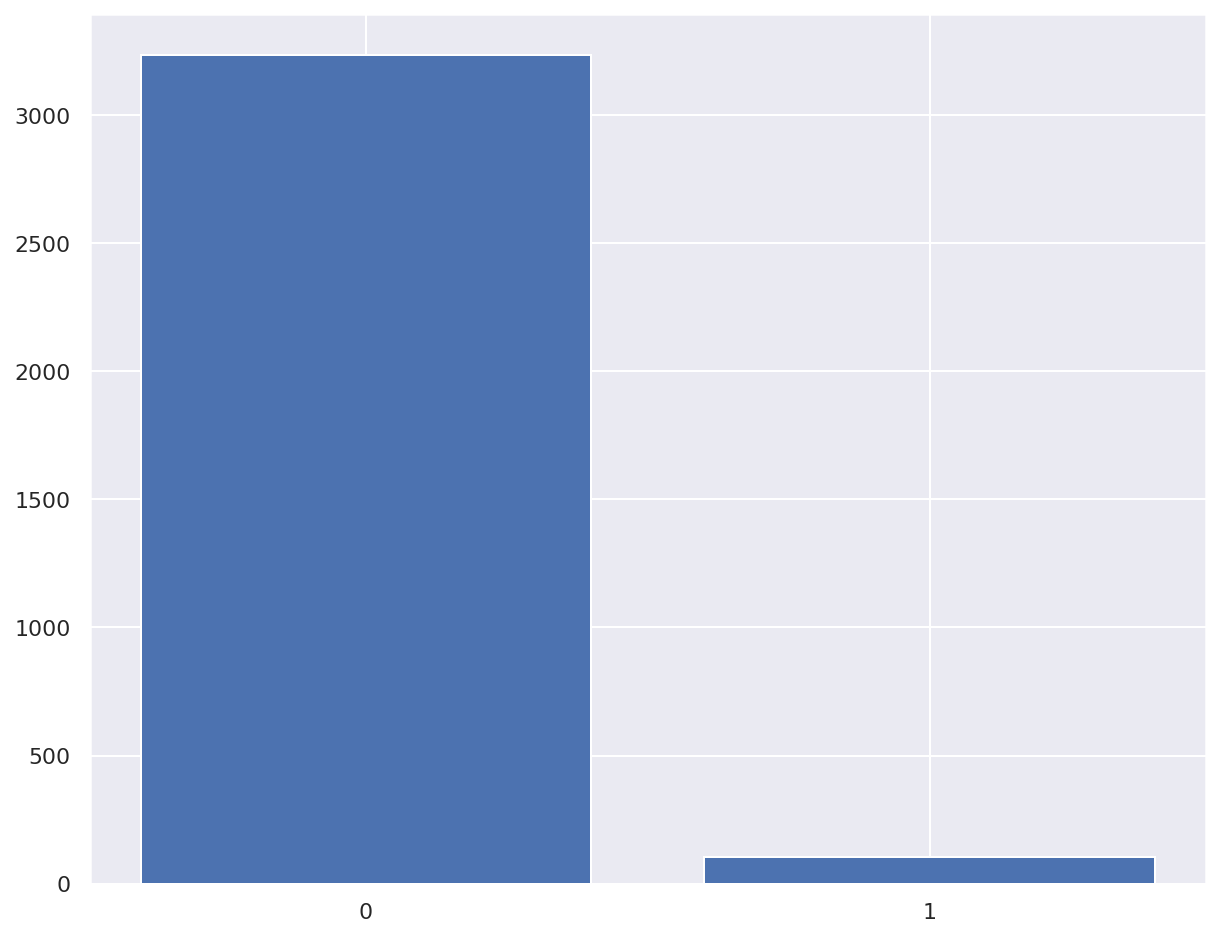

0    3234
1     105
Name: 정류장 유무, dtype: int64


In [48]:
plt.bar(S_target.unique(), S_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(S_target.value_counts())

In [49]:
s_df.columns

Index(['Unnamed: 0', 'geometry', '인구', '고령인구', '건물수', '건물수(단독)', '건물수(공동)',
       '장애인 인구', '출발지도착지', '정류장 개수', '정류장 유무'],
      dtype='object')

필요없는 column값 제거

In [50]:
s_df = s_df.drop(['geometry'], axis=1)
s_df = s_df.drop(['Unnamed: 0'], axis=1)
s_df = s_df.drop(['정류장 유무'], axis =1)
s_df = s_df.drop(['정류장 개수'], axis =1)
s_df = s_df.drop(['출발지도착지'], axis =1)


s_df.head(5)

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.0,0.0,1.0,1.0,0.0,0.000000
1,6.0,0.0,2.0,2.0,0.0,0.623145
2,0.0,0.0,6.0,3.0,0.0,0.000000
3,22.0,10.0,12.0,11.0,0.0,2.284866
4,0.0,0.0,4.0,1.0,0.0,0.000000


정규화(Feature Scaling)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s_df[:] = scaler.fit_transform(s_df[:])

In [52]:
s_df

,인구,고령인구,건물수,건물수(단독),건물수(공동),장애인 인구
0,0.000000,0.000000,0.004762,0.006369,0.0,0.000000
1,0.002189,0.000000,0.009524,0.012739,0.0,0.006412
2,0.000000,0.000000,0.028571,0.019108,0.0,0.000000
3,0.008026,0.019231,0.057143,0.070064,0.0,0.023512
4,0.000000,0.000000,0.019048,0.006369,0.0,0.000000
...,...,...,...,...,...,...
3334,0.003283,0.011538,0.028571,0.038217,0.0,0.008799
3335,0.008756,0.019231,0.052381,0.063694,0.0,0.023464
3336,0.000000,0.000000,0.023810,0.012739,0.0,0.000000
3337,0.000000,0.000000,0.014286,0.012739,0.0,0.000000


In [53]:
data_test = s_df
target_test = S_target

SMOTE 적용

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=22)
data_train_over,target_train_over = smote.fit_resample(data_train,target_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', data_train.shape, target_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', data_train_over.shape, target_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(target_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2776, 6) (2776,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (4880, 6) (4880,)
SMOTE 적용 후 레이블 값 분포: 
 0    2440
1    2440
Name: 정류장 유무, dtype: int64


In [55]:
#나오는 방식 만들기
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print("오차 행렬")
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

#DecisionTree Classifier

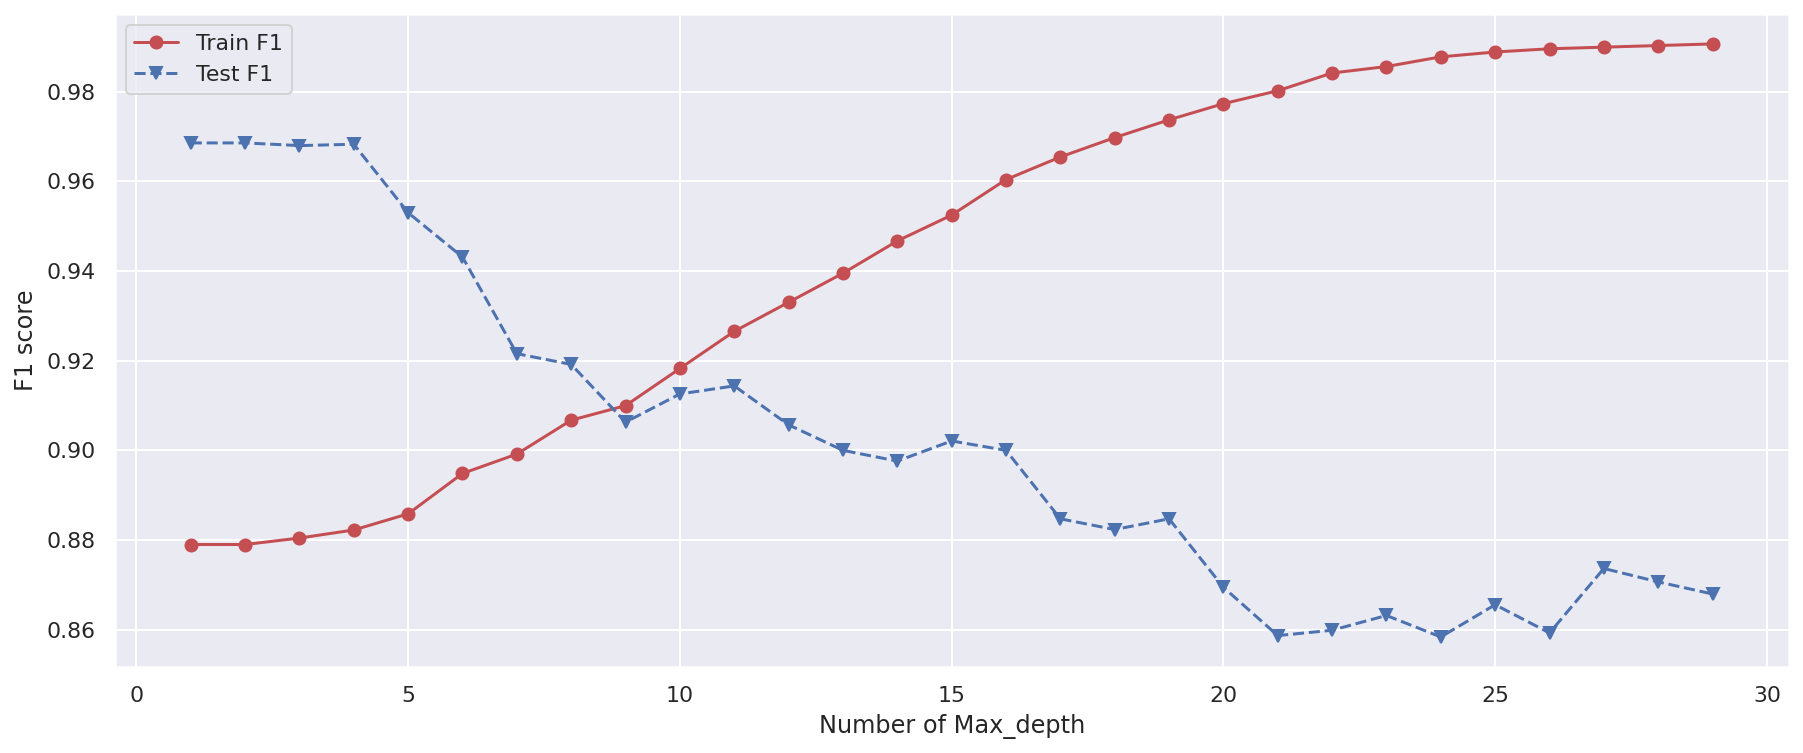

best testF1 : 0.9685534591194969


In [56]:
numNeighbors = list(range(1, 30))
trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = DecisionTreeClassifier(max_depth=k, random_state=22)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of Max_depth')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [57]:
print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))
# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.991
RF 테스트 세트 정확도: 0.868
오차 행렬
[[2856  378]
 [  63   42]]
정확도: 0.8679, 정밀도: 0.1000, 재현율: 0.4000, F1: 0.1600, AUC: 0.6191


#KNN

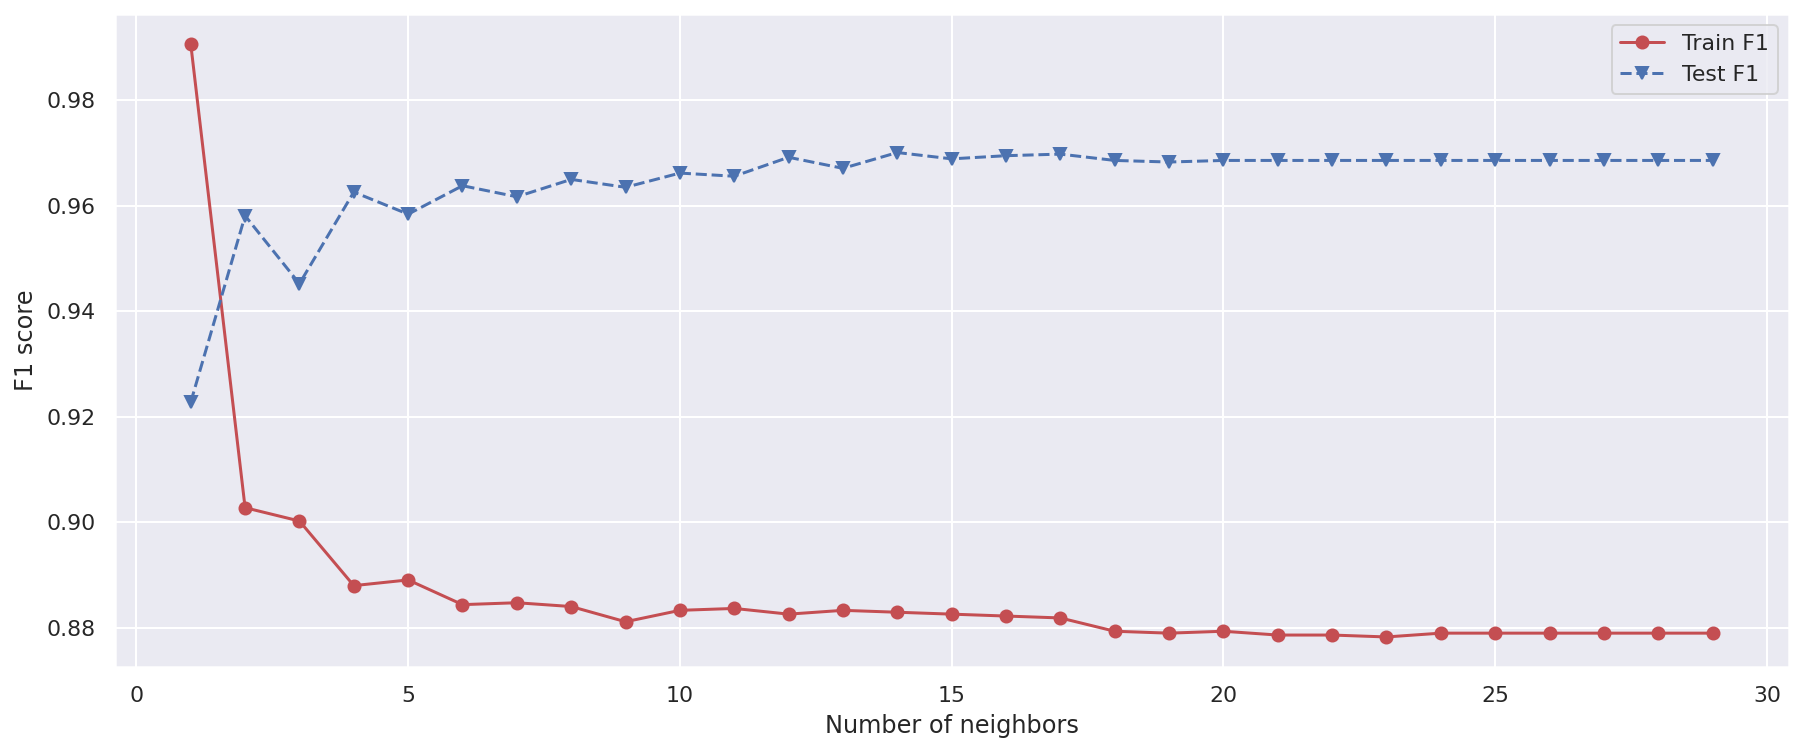

best testF1 : 0.9700509134471399


In [60]:
import matplotlib.pyplot as plt

numNeighbors = list(range(1, 30))
trainF1 = []
testF1 = []
for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    trainF1.append(f1_score(target_train, Y_predTrain, average='micro'))
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))
plt.figure(figsize=(15, 6))
plt.plot(numNeighbors, trainF1, 'ro-', numNeighbors, testF1, 'bv--')
plt.legend(['Train F1', 'Test F1'])
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')
plt.show()
print("best testF1 :", max(testF1))

In [61]:
print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.879
RF 테스트 세트 정확도: 0.969
오차 행렬
[[3234    0]
 [ 105    0]]
정확도: 0.9686, 정밀도: 0.0000, 재현율: 0.0000, F1: 0.0000, AUC: 0.8016


#Ensemble

In [62]:
from sklearn import ensemble

# trainAcc = []
# testAcc = []

# X_test, Y_test = data_test, target_test

#*RandomForest* 

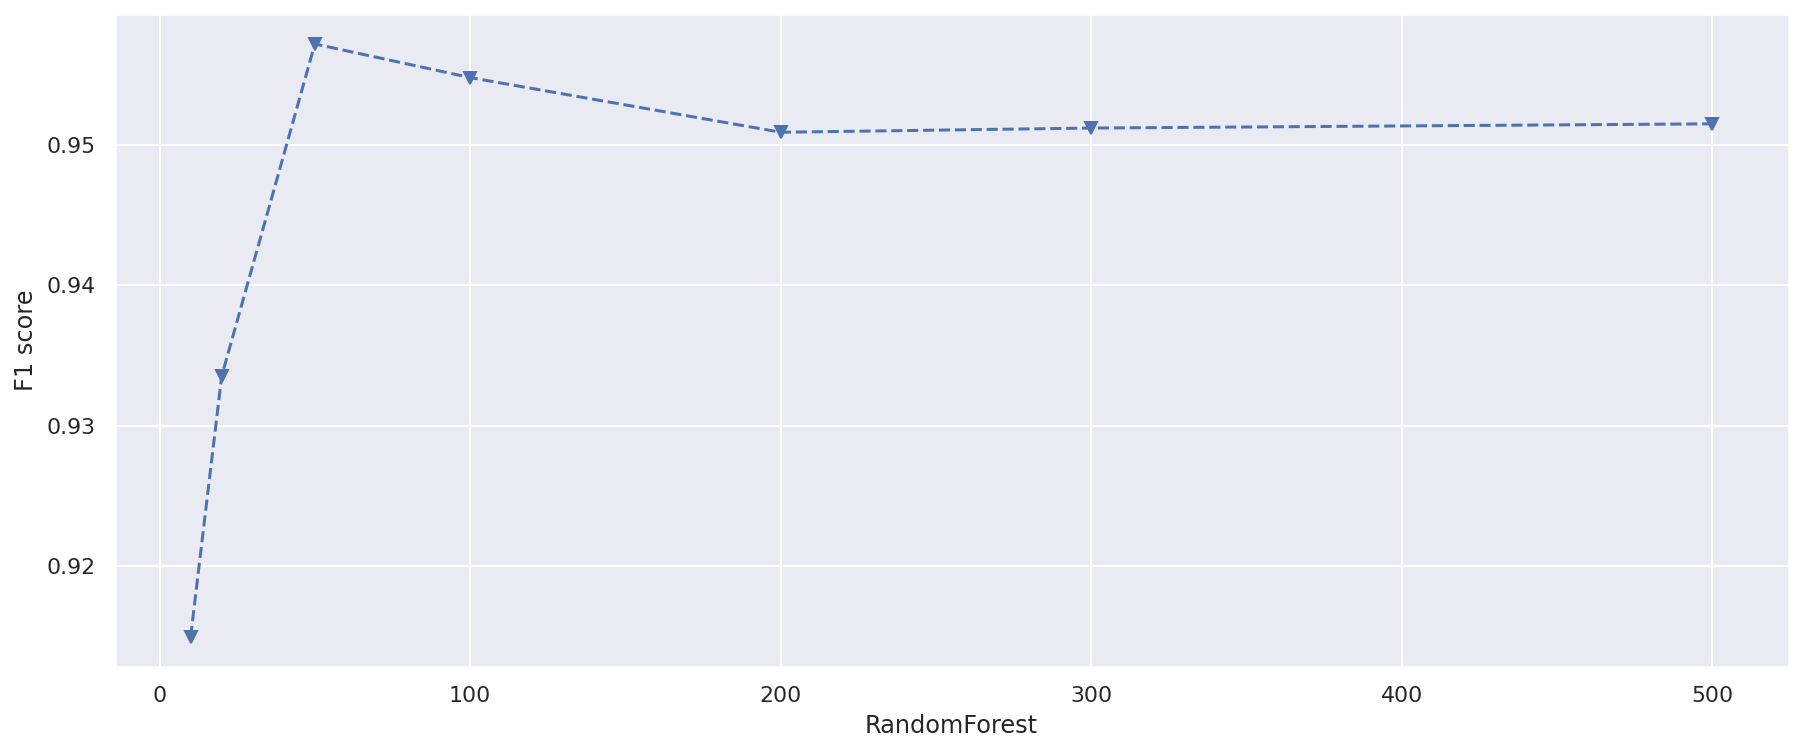

In [65]:
numBaseClassifiers = [10, 20, 50, 100, 200, 300, 500]
testF1 = []
bestf1 = []

for k in numBaseClassifiers:
    clf = ensemble.RandomForestClassifier(n_estimators=k, random_state=22)
    clf.fit(data_train, target_train)
    Y_predTrain = clf.predict(data_train)
    Y_predTest = clf.predict(data_test)
    testF1.append(f1_score(target_test, Y_predTest, average='micro'))

plt.figure(figsize=(15, 6))
plt.plot(numBaseClassifiers, testF1, 'bv--')
plt.xlabel('RandomForest')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [66]:
print("RF 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("RF 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

RF 훈련 세트 정확도: 0.991
RF 테스트 세트 정확도: 0.951
오차 행렬
[[3157   77]
 [  85   20]]
정확도: 0.9515, 정밀도: 0.2062, 재현율: 0.1905, F1: 0.1980, AUC: 0.7735


#Bagging

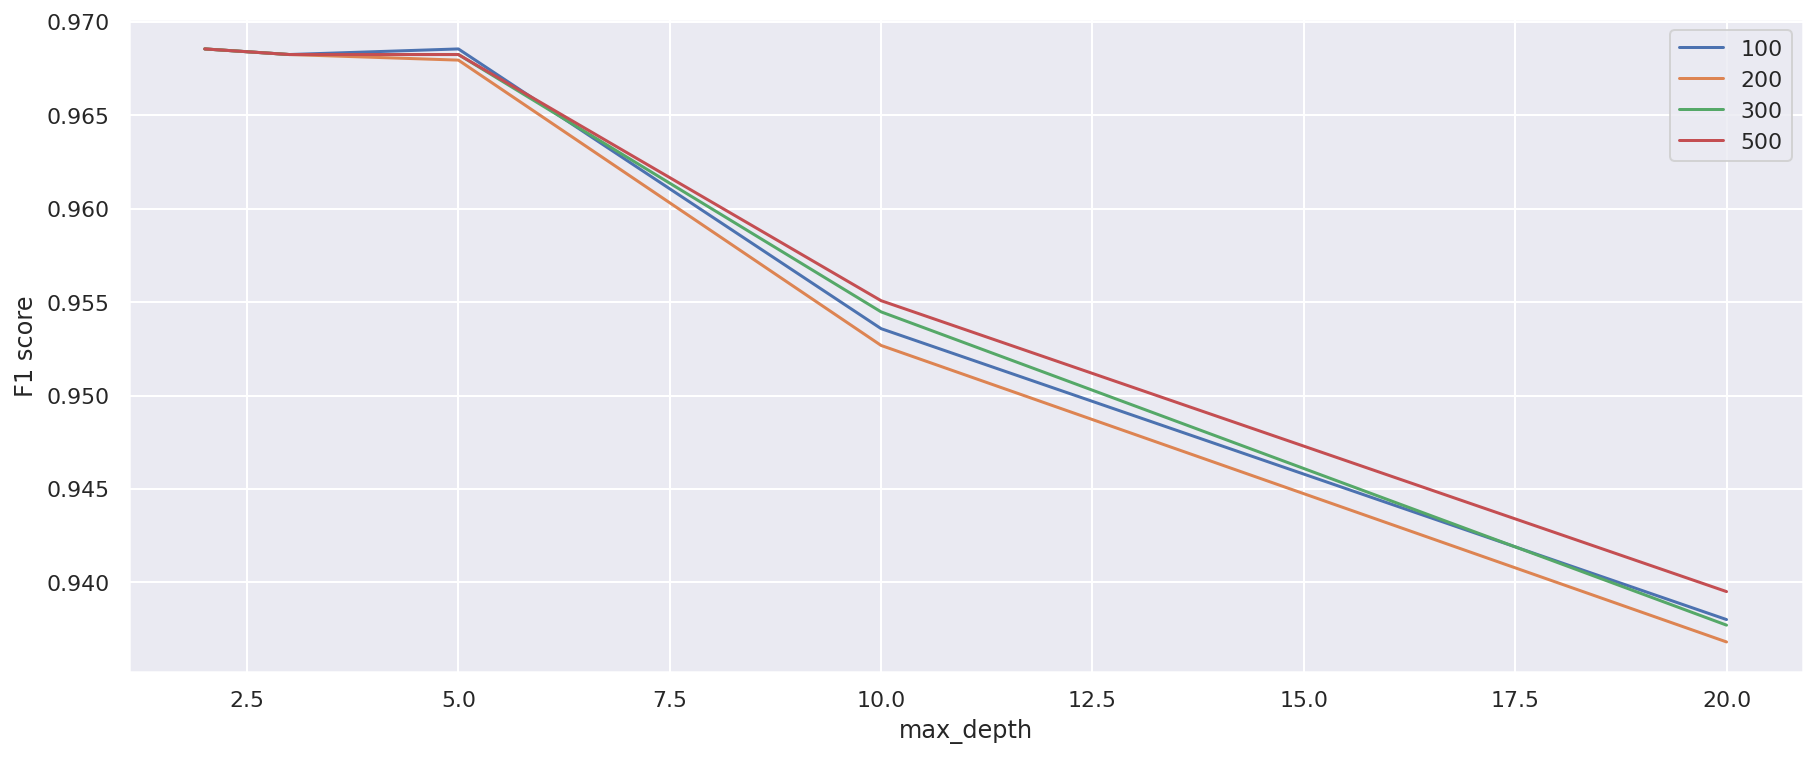

In [67]:
numBaseClassifiers = [100, 200, 300, 500]
max_depths = [2, 3, 5, 10, 20]
F1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)
        clf.fit(data_train, target_train)
        Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))
    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []
    
plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [68]:
print("Bagging 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("Bagging 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)

Bagging 훈련 세트 정확도: 0.991
Bagging 테스트 세트 정확도: 0.940
오차 행렬
[[3111  123]
 [  79   26]]
정확도: 0.9395, 정밀도: 0.1745, 재현율: 0.2476, F1: 0.2047, AUC: 0.7775


#Adaboost 

In [ ]:
numBaseClassifiers = [50, 100, 200, 300, 500]
max_depths = [1, 2, 3, 5, 10, 20]
F1 = []
testF1 = []

plt.figure(figsize=(15, 6))
for k in numBaseClassifiers:
    for maxdepth in max_depths:
        clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth), n_estimators=k, random_state=22)
        clf.fit(data_train, target_train)
        Y_predTrain = clf.predict(data_train)
        Y_predTest = clf.predict(data_test)
        F1.append(f1_score(target_test, Y_predTest, average='micro'))

    plt.plot(max_depths, F1)
    testF1.append(max(F1))
    F1 = []

plt.legend(numBaseClassifiers)
plt.xlabel('max_depth')
plt.ylabel('F1 score')

bestf1.append(max(testF1))

In [ ]:
print("AdaBoost 훈련 세트 정확도: {:.3f}".format(clf.score(data_train, target_train)))
print("AdaBoost 테스트 세트 정확도: {:.3f}".format(clf.score(data_test, target_test)))

# 예측
preds = clf.predict(data_test)
pred_proba = clf.predict_proba(data_test)[:,1]

# 평가
get_clf_eval(target_test, preds, pred_proba)


RF 훈련 세트 정확도: 0.994
RF 테스트 세트 정확도: 0.902
오차 행렬
[[1212   66]
 [  68   18]]
정확도: 0.9018, 정밀도: 0.2143, 재현율: 0.2093, F1: 0.2118, AUC: 0.6332
